In real-world data is messy and often times has missing values which is causing problems when it comes to do analysis on data. Before starting any research on a dataset, missing values has to be checked. 

There are many ways to handle mising data. I will demostrate it in a toy dataset which we will create. Specifically, we will answer the following questions in this post.

- What is missing data and types of missing values? 
- How to detect missing values?
- How to handle missing values? 

Following packages will be used in this tutorial. If you don't have any of these, just *pip install {package name}.*

In [1]:
# This piece of code block the warning messages
import warnings 
warnings.filterwarnings('ignore')

# Import libraries and check the versions
import pandas as pd
import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
%matplotlib inline


print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.1 |Anaconda custom (x86_64)| (default, Mar 22 2017, 19:25:17) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Numpy version 1.12.1
Pandas version 0.19.2
Matplotlib version 2.0.0
Missingno version 0.3.5


Numpy, pandas and matplotlib are commonly used by people in data science. In this post, we will use two packages that you might not have in your system. However, they are easy to install. Just uncomment the package you are missing below and run the cell. Once you install, go back to previous cell and import the all packages and make sure you have everthing installed. 

In [2]:
# !pip install import pandas_profiling
# !pip install missingno

First we will create a toy dataset has some missing values.

In [3]:
data = {'name': ['Michael', 'Jessica', 'Sue', 'Jake', 'Amy', 'Tye'],
        'gender':[None,'F',np.NaN,'F',np.NaN, 'M'],
        'height': [123, 145, 100 , np.NaN, None, 150],
        'weight': [10, np.NaN , 30, np.NaN, None, 20],
        'age': [14, None, 29 , np.NaN, 52, 45],
        }
df = pd.DataFrame(data, columns = ['name','gender', 'height', 'weight', 'age'])
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,NaN
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,NaN
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


### What is missing data and types of missing values? 

Missing data in a dataset is the value that has no computational value.If you noticed, we created two types of missing values in our toy dataset. *None* and *np.Nan*. Difference between *None* and *NaN(Not a Number)* is that *None* is the Pythonic way of representing missing values and *NaN* is much more known by other systems. 

The nice thing is that Pandas has built to handle both of these data types. On the other hand, NumPy has special built-in functions to handle missing data. Let's see an example below.

In [4]:
# create a numpy array that has missing value
a = np.array([1,2,np.nan, 4])
a.dtype

dtype('float64')

In [5]:
# sum doesn't work how it is expected
np.sum(a)

nan

In [6]:
# use nansum for expected result
np.nansum(a)

7.0

### How to detect missing values in Pandas?

I will show three ways that I find useful to identify missing values in a dataset.

1- .info(), isnull() and notnull() are useful to detect missing values

In [7]:
# .info() is general information about a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
name      6 non-null object
gender    3 non-null object
height    4 non-null float64
weight    3 non-null float64
age       4 non-null float64
dtypes: float64(3), object(2)
memory usage: 320.0+ bytes


In [8]:
# sum of the missing values in each column
df.isnull().sum()

name      0
gender    3
height    2
weight    3
age       2
dtype: int64

In [9]:
# notnull() is opppsite of isnull()
df.notnull().sum()

name      6
gender    3
height    4
weight    3
age       4
dtype: int64

2- [Missingno][1] is a great package to qucikly display missing values in a dataset. More examples and features can be found in its [github repo][1].

[1]:https://github.com/ResidentMario/missingno

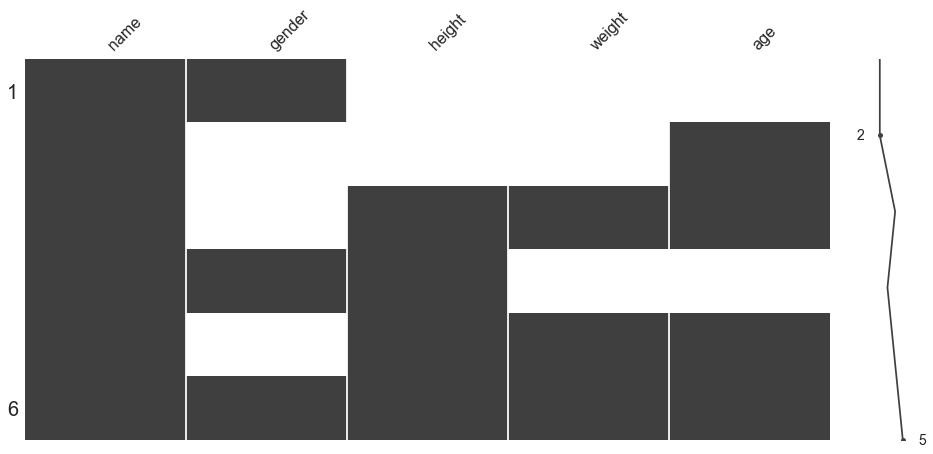

In [10]:
msno.matrix(df.sample(6),
           figsize=(16,7),
           width_ratios=(15,1))

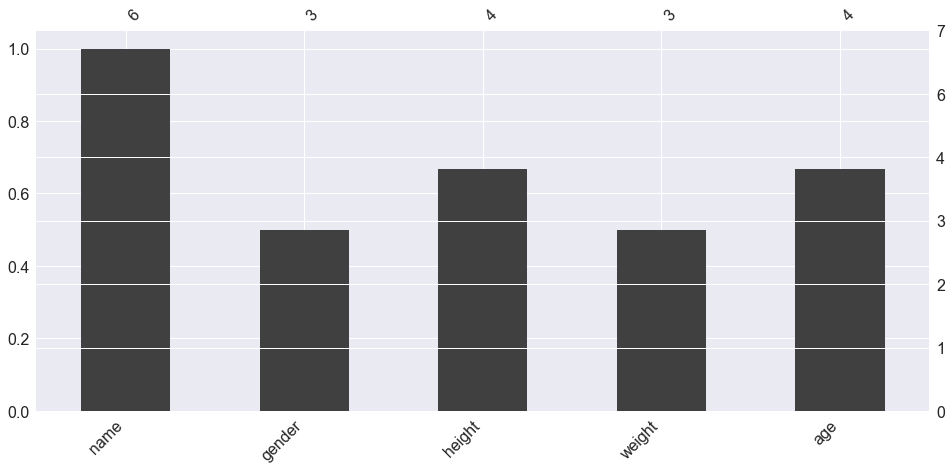

In [11]:
msno.bar(df.sample(6),
           figsize=(16,7))

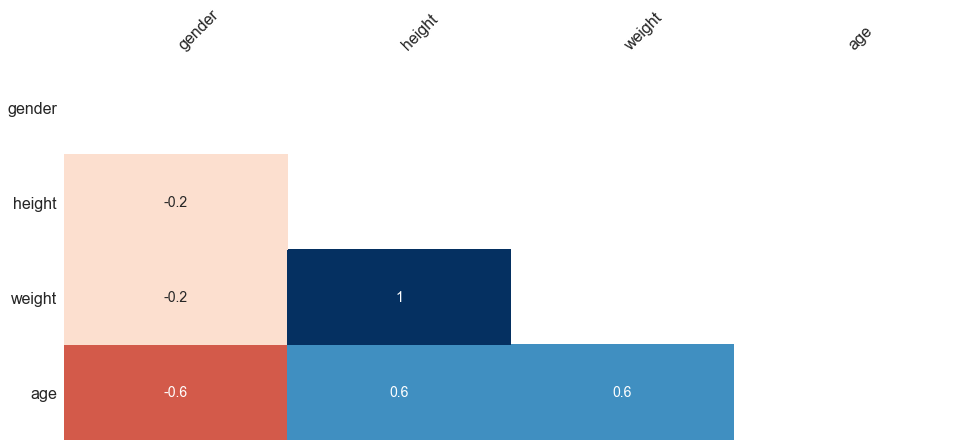

In [12]:
# correlation between missing values
msno.heatmap(df.sample(5),
           figsize=(16,7))

3- pandas_profiling is a high level overview of the dataset. It gives many information about the dataset as well as each column.

In [13]:
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,6
Total Missing (%),33.3%
Total size in memory,320.0 B
Average record size in memory,53.3 B
Numeric,3
Categorical,1
Date,0
Text (Unique),1
Rejected,0
Distinct count,5


### How to handle missing values? 

First way is to get rid of the rows that have missing values. Pandas built-in function *dropna()* is for that. Pandas does not allow a single cell deletion. Either all row or all cell has to be removed. 

In [14]:
# drops the all rows have missing values, note that inplace is False by defult which means
# original dataset has not changed
df.dropna()

,name,gender,height,weight,age
5,Tye,M,150.0,20.0,45.0


In [15]:
# parameter axis=1 deletes the columns
df.dropna(axis = 1)

,name
0,Michael
1,Jessica
2,Sue
3,Jake
4,Amy
5,Tye


If the dataset is not big or instead of deleting records you might want to keep the rows/columns that has missing data. In that case, use *fillna()*. How to fill the missing values is up to you. I will show a few ways below.

In [16]:
# fills all the missing values with the spcified value, inplace is False.
df['age'].fillna(0)

0    14.0
1     0.0
2    29.0
3     0.0
4    52.0
5    45.0
Name: age, dtype: float64

*ffill* means forward-fill. Here we filled the index row 2 with the previous value which F. On the other hand, first row has no previous row to copy data from. Therefore, it remained *None*. 

In [17]:
df['gender'].fillna(method='ffill')

0    None
1       F
2       F
3       F
4       F
5       M
Name: gender, dtype: object

To overcome this there is *bfill* parameter stands for back-fill works opposite way of *ffill* which perfectly covers all our missing values in the *gender* column. 

In [18]:
# inplace is True. Changes has applied to the dataset.
df['gender'].fillna(method='bfill', inplace=True)

The other way of is fillig missing is using the mean value of certain rows/columns. For example, we filled missing values in the height column with each gender's mean value. You could use *median*, *mode* etc.

In [19]:
df['height'].fillna(df.groupby('gender')['height'].transform('mean'), inplace=True)

This time, we will fill the weight column with the median of all values in that columns

In [20]:
df['weight'].fillna(df['weight'].median(), inplace=True)

In [21]:
# only age column has missing values
df.isnull().sum()

name      0
gender    0
height    0
weight    0
age       2
dtype: int64

Another way to fill missing data is *interpolation*. This method allows you to fill the missing values depending upon with the previous and next values.In our example, mising values filled linearly by default. 

In [22]:
df['age'].interpolate(inplace=True)

Our dataframe is finally completed.

In [23]:
df

,name,gender,height,weight,age
0,Michael,F,123.000000,10.0,14.0
1,Jessica,F,145.000000,20.0,21.5
2,Sue,F,100.000000,30.0,29.0
3,Jake,F,122.666667,20.0,40.5
4,Amy,M,150.000000,20.0,52.0
5,Tye,M,150.000000,20.0,45.0


Let's prove that we have no missing data, anymore.

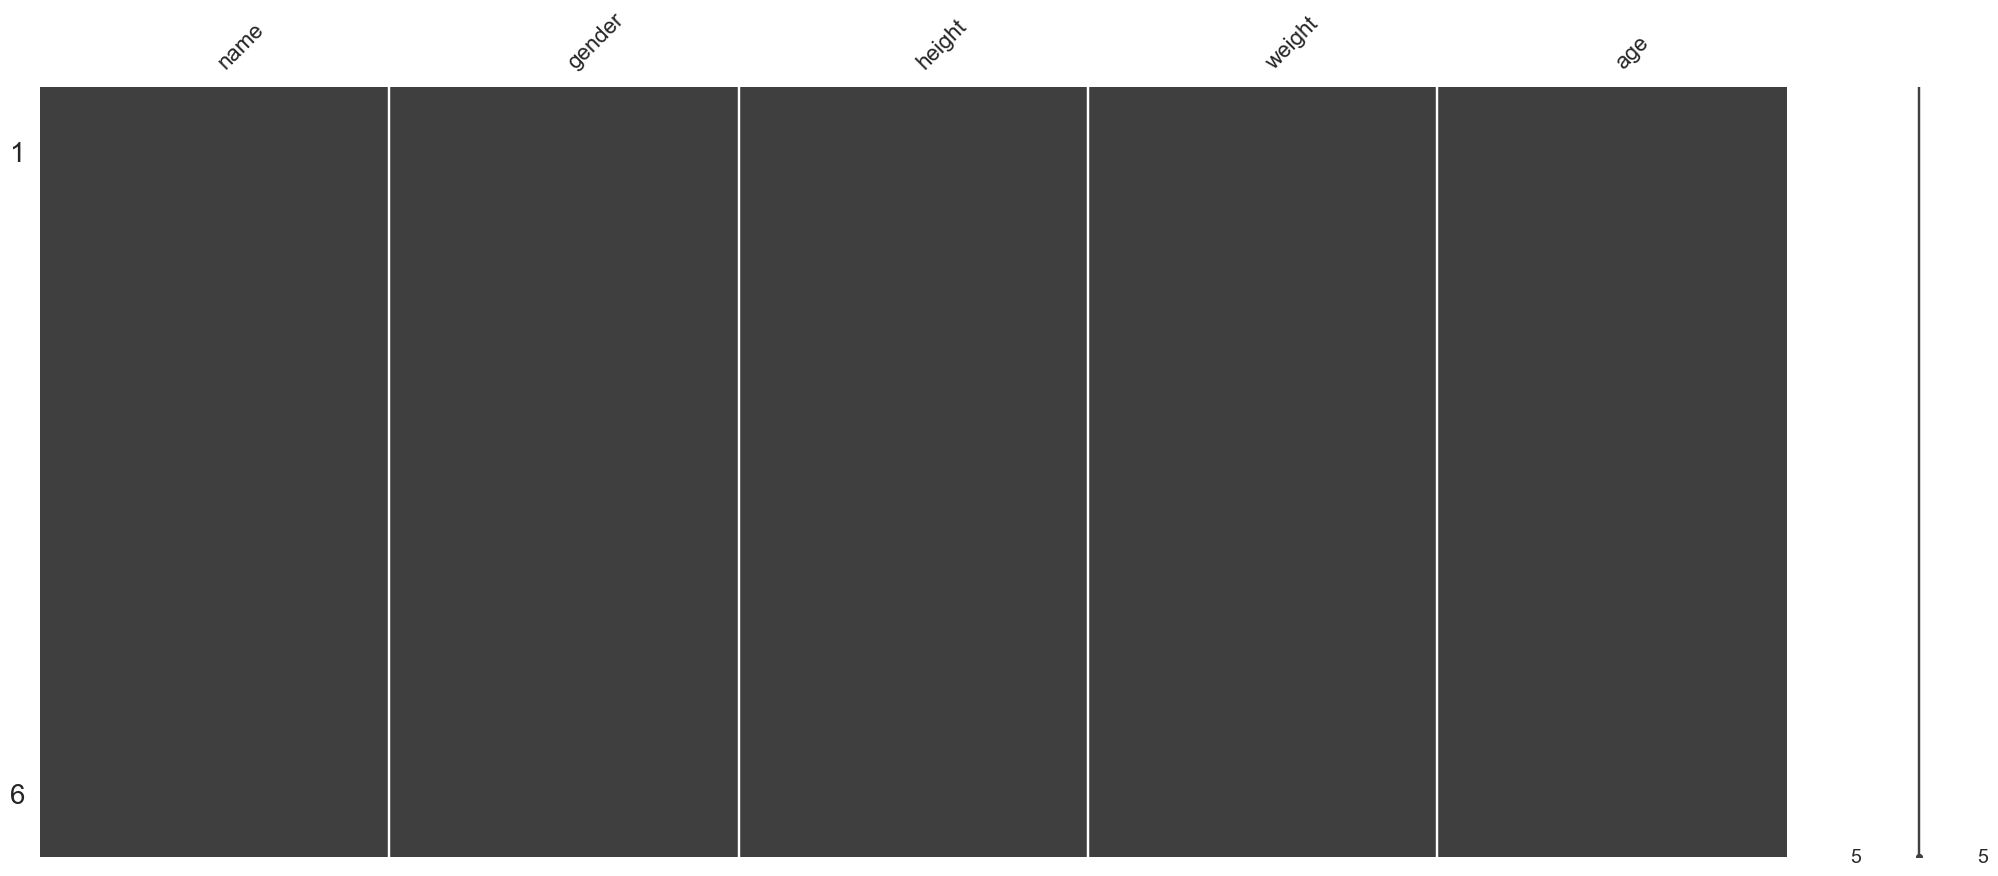

In [24]:
msno.matrix(df)

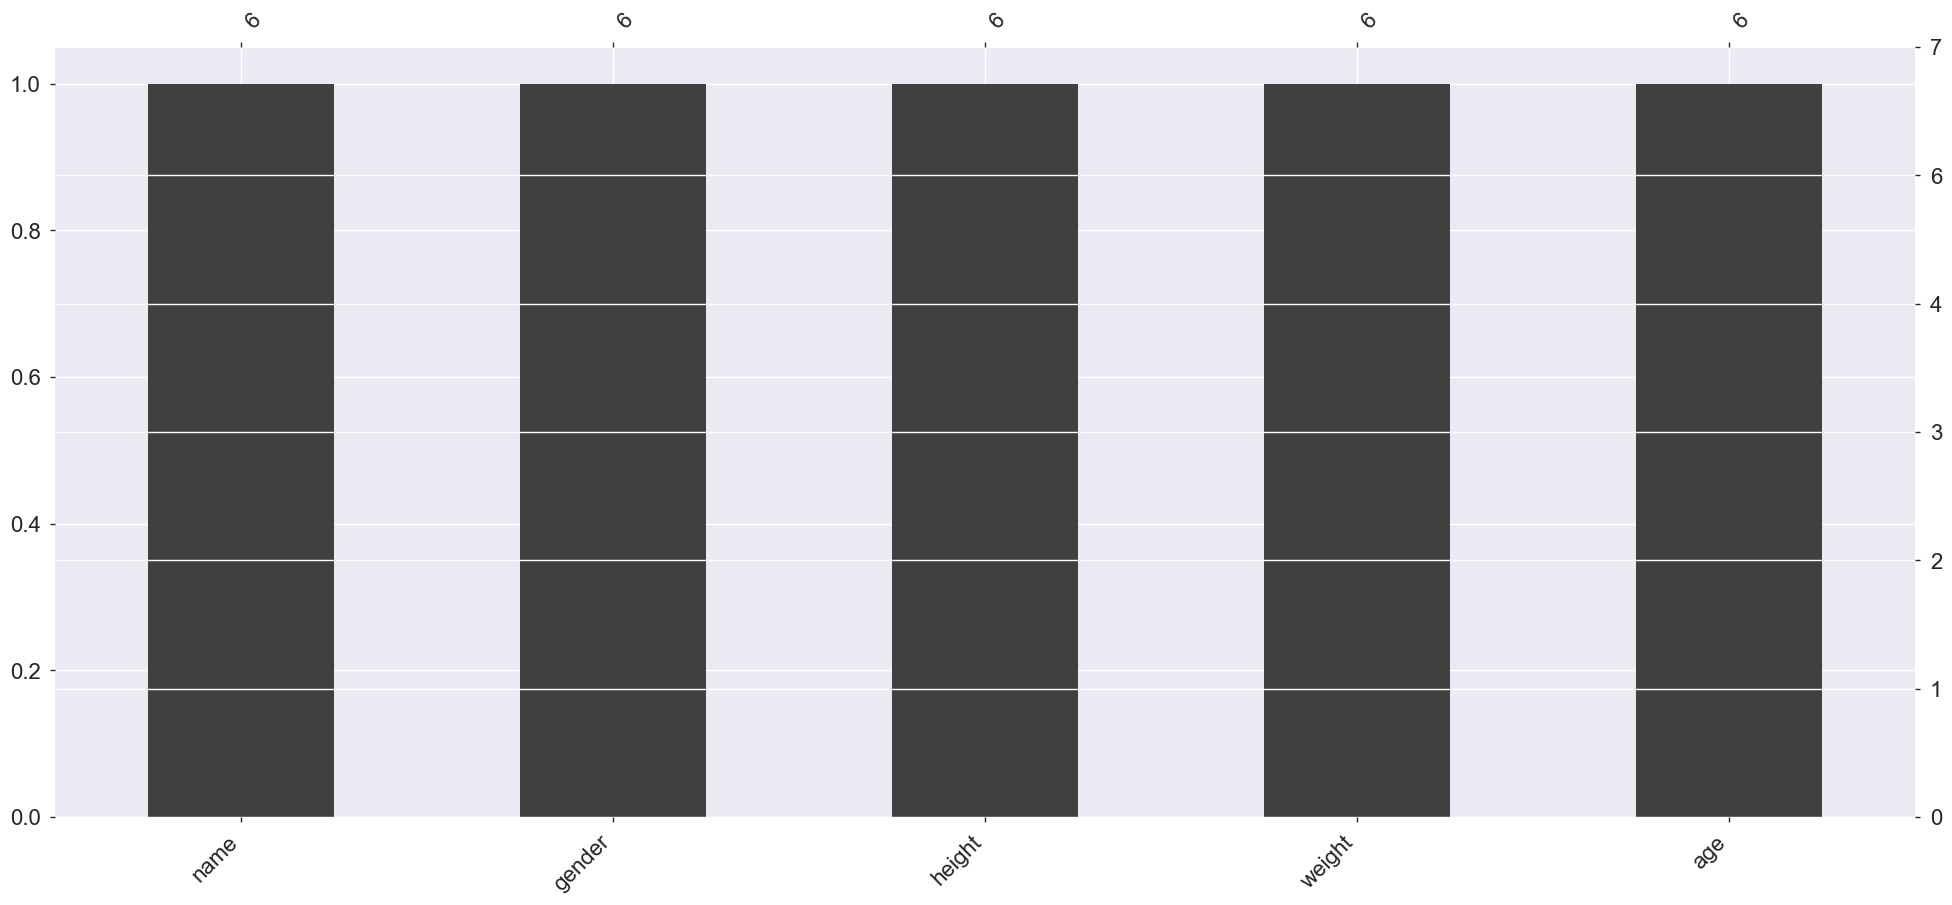

In [25]:
msno.bar(df)

### Further Learning

Most of the methods we have seen here have different parameters that fills the dataset. I recommend to play with the parameter, change the parameters and observe the result set. 

[Pandas documentation][7] for working with missing data. 

[Handling missing data][1] by Jake VanderPlas

[Missing Data In Pandas Dataframes][2] by Chris Albon

[How to Handle Missing Data with Python][3] by Jason Brownlee

[Practical Data Cleaning][4] by Lee Baker

[Handling Missing Values in Pandas DataFrames: the Hard Way, and the Easy Way][5] from enthought.com blog

Find more about [Interpolation here.][6]


[1]: https://www.oreilly.com/learning/handling-missing-data
[2]: https://chrisalbon.com/python/pandas_missing_data.html
[3]: http://machinelearningmastery.com/handle-missing-data-python
[4]: http://data-science-university.thinkific.com/courses/practical-data-cleaning
[5]: http://blog.enthought.com/enthought-canopy/data-import-tool/handling-missing-values-pandas-dataframes-hard-way-easy-way/#.WPlfh1KZMhs
[6]:http://pandas.pydata.org/pandas-docs/stable/missing_data.html#interpolation
[7]:http://pandas.pydata.org/pandas-docs/stable/missing_data.html